### ARIMA - Autoregressive Integrated Moving Average
### ARIMA(p,d,q) using dataset `Combined_Log_Transformed.csv`

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from pmdarima import auto_arima

# Read and inspect the data
df = pd.read_csv('../../../../Data/Creation/CSV/Combined_Log_Transformed.csv')
df.head()

,date,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx,Real Oil Prices
0,1986-01,8.817058,8.688117,3.857715,13.408814,11.719838,4.019102,4.149063,4.123819,4.290384,...,3.818964,2.315501,2.465554,2.254445,4.560173,11.178487,11.711347,6.117475,2.897088,3.038045
1,1986-02,8.821909,8.693279,3.855241,13.403109,11.710476,4.012230,4.139512,4.113869,4.281726,...,3.823585,2.316488,2.468100,2.257588,4.563306,11.191452,11.721119,6.117194,3.026465,2.645677
2,1986-03,8.831298,8.702643,3.858643,13.404085,11.703515,4.005200,4.136150,4.110498,4.278101,...,3.827946,2.317474,2.462150,2.259678,4.554929,11.207555,11.730876,6.109472,3.159720,2.447396
3,1986-04,8.834686,8.705961,3.864785,13.424021,11.709872,4.006344,4.139662,4.111926,4.284721,...,3.829749,2.318459,2.468947,2.257588,4.566429,11.231676,11.744940,6.120473,3.136164,2.469144
4,1986-05,8.835888,8.706755,3.870784,13.414384,11.724289,4.008305,4.143116,4.114232,4.290291,...,3.831030,2.320425,2.473171,2.260721,4.551769,11.269783,11.768419,6.127810,2.938781,2.646890


#### Inspect the data, specifically the target

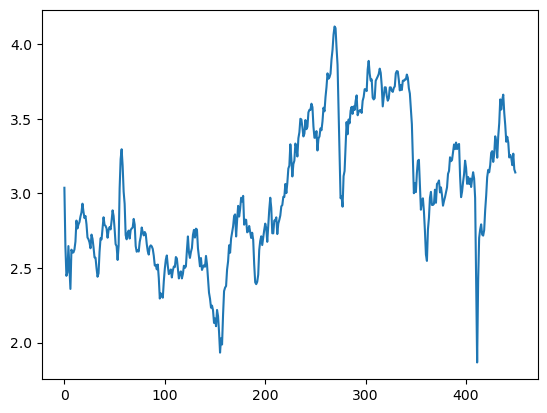

In [23]:
oil_prices = df['Real Oil Prices']
oil_prices.plot()
plt.show()

# Check for Stationarity with Augmented Dickey-Fuller Test

In [24]:
def test_stationarity(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    for key, value in result[4].items():
        print(f'{key}: {value}')


test_stationarity(oil_prices)

ADF Statistic: -2.6366363996261564
p-value: 0.08565917232769171
1%: -3.4450642060791097
5%: -2.868027634065253
10%: -2.5702256691640515


In [25]:
# Differencing to achieve stationarity
diff_oil_prices = oil_prices.diff().dropna()
test_stationarity(diff_oil_prices)

ADF Statistic: -11.43549307824285
p-value: 6.363019282086992e-21
1%: -3.4451307246616514
5%: -2.86805689169311
10%: -2.570241263729327


### Save the dataset to be used in web app

In [26]:
diff_oil_prices.to_csv('./diff_oil_prices_arima.csv')

In [27]:
# Split data into training and testing sets (80% train, 20% test)
train_size = int(len(oil_prices) * 0.8)
train, test = oil_prices[:train_size], oil_prices[train_size:]

## Auto ARIMA Model: Find the best parameters for an ARIMA model

In [28]:
# Fit auto_arima model to find optimal parameters
auto_model = auto_arima(
    train, 
    seasonal=False,
    trace=True,  # Allow to print results while training
    suppress_warnings=True,
    max_order=None,  # This ensures there is no cap on the combined p and q.
    max_p=5,  # Maximum value of p to try
    max_d=5,  # Maximum value of d to try
    max_q=5,  # Maximum value of q to try
    stepwise=True  # Stepwise algorithm can be faster and more efficient in parameter selection
)
print(auto_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-763.390, Time=0.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-737.731, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-763.885, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-763.318, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-739.700, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-762.284, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-762.231, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-765.259, Time=0.38 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-763.374, Time=0.61 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-744.909, Time=0.18 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-760.502, Time=0.23 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-761.356, Time=0.51 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-767.254, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-764.184, Time=0.08 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=-764.237, Time=0.06 sec
 ARIMA(3,1

## Train the ARIMA Model

In [29]:
# Train ARIMA model with the best parameters
model = ARIMA(train, order=auto_model.order)
results = model.fit()

## Training Metrics

In [30]:
# In-sample prediction
train_predictions = results.predict(start=train.index[0], end=train.index[-1])

# Calculate training metrics
train_mae = mean_absolute_error(train, train_predictions)
train_mse = mean_squared_error(train, train_predictions)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(train, train_predictions)
train_mape = np.mean(np.abs((train - train_predictions) / train)) * 100

# Display training metrics
print("\nTraining Metrics:")
print(f"MAE: {train_mae}")
print(f"MSE: {train_mse}")
print(f"RMSE: {train_rmse}")
print(f"MAPE: {train_mape}%")
print(f"R2 Score: {train_r2}")


Training Metrics:
MAE: 0.07127244087652365
MSE: 0.032417485683461325
RMSE: 0.18004856479145098
MAPE: 2.4572014266634334%
R2 Score: 0.8659000425694205


### Forecasting with ARIMA:

In [31]:
# Forecasting
forecast = results.get_forecast(steps=len(test)) # Forecast the same length as the test set because we want to compare the predictions to the actual values
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

### Plot the results:

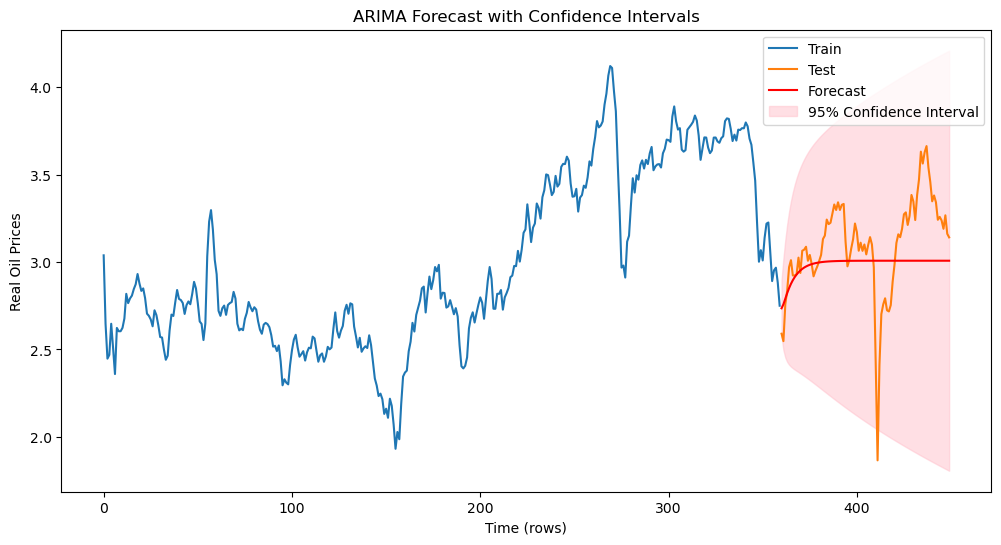

In [32]:
# Plot the results with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast_mean, color='red', label='Forecast')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Time (rows)')
plt.ylabel('Real Oil Prices')
plt.title('ARIMA Forecast with Confidence Intervals')
plt.legend()
plt.show()

### Evaluate the model:

In [33]:
# Evaluate the model
mae = mean_absolute_error(test, forecast_mean)
mse = mean_squared_error(test, forecast_mean)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test - forecast_mean) / test)) * 100
r2_score = r2_score(test, forecast_mean)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}%")
print(f"R2 Score: {r2_score}")

MAE: 0.21403636052193803
MSE: 0.0811999710470508
RMSE: 0.28495608617302914
MAPE: 7.0562862038588445%
R2 Score: -0.05122412290694278


### Model Evaluation:

#### First Attempt:
- MAE (Mean Absolute Error):
    - Value: 0.20997945032798257

- MSE (Mean Squared Error):
    - Value: 0.07900571322625227

- RMSE (Root Mean Squared Error):
    - Value: 0.28107954964075965

- MAPE (Mean Absolute Percentage Error):
    - Value: 6.948419702919815%

- R2 (R Squared):
    - Value: -0.022817009907308172


- The MAE, MSE, and RMSE are lower indicating the model is making smaller errors in the forecasts.
- The MAPE of 6.95% suggests the average forecast error relative to the actual values is much lower now. 
- However, the R2 score is negative at -0.023. This indicates the model is worse than just predicting the mean value of the time series. So the model fit seems to have degraded.
- The lower errors but worse R2 score suggests the model may be overfit now. It is matching the training data closely but not generalizing as well to the test set.

Overall, the updated metrics show some improvement in forecast accuracy (lower errors) but worse ability to explain the data variance. 
The goal is to find a good balance between low error and good generalization.

## Future Forecasting with ARIMA:

In [34]:
# Future Forecasting beyond available data
n_periods = 30
future_forecast = results.get_forecast(steps=n_periods)
future_forecast_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

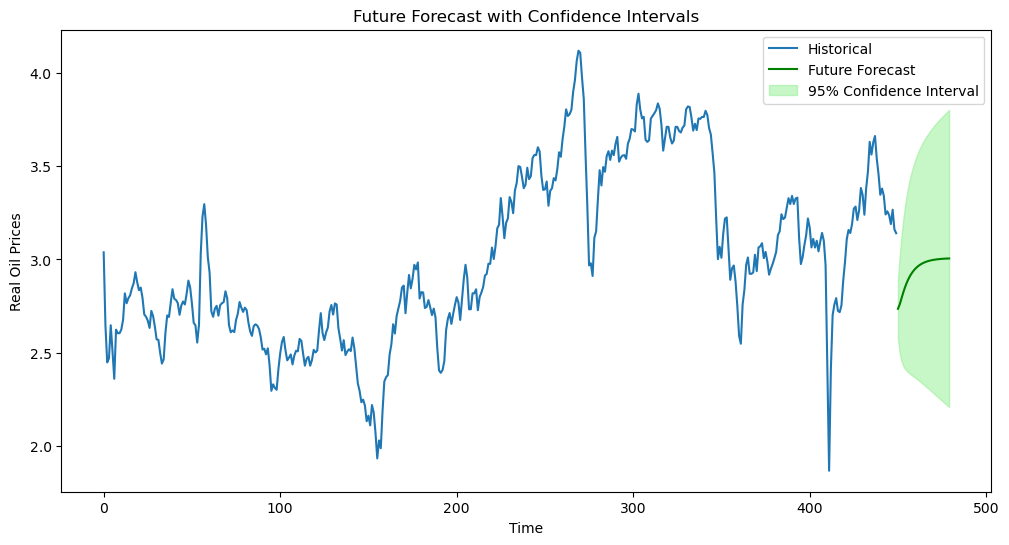

In [35]:
# Plot future forecast
plt.figure(figsize=(12, 6))
plt.plot(oil_prices.index, oil_prices, label='Historical')
plt.plot(np.arange(len(oil_prices), len(oil_prices) + n_periods), future_forecast_mean, color='green', label='Future Forecast')
plt.fill_between(np.arange(len(oil_prices), len(oil_prices) + n_periods), future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='lightgreen', alpha=0.5, label='95% Confidence Interval')
plt.xlabel('Time')
plt.ylabel('Real Oil Prices')
plt.title('Future Forecast with Confidence Intervals')
plt.legend()
plt.show()

A 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. In the context of forecasting with models like ARIMA, a 95% confidence interval around a forecasted value means that if you were to make a large number of additional samples, then 95% of the time, the true future value would fall within that range.

In forecasting, we use past data to make educated guesses about the future. The 95% confidence interval tells us that, based on this past data, we're pretty sure (95% sure, to be exact) that the actual future value will land within a certain range. It's like saying, "Based on how things have gone before, I'm 95% confident that sales next month will be between $1,000 and $1,200."

Why not 100%? Because there's always some uncertainty. Maybe there's an unusual event that affects sales, or perhaps there's just random fluctuation that we can't predict. The 95% confidence interval accounts for that usual level of unpredictability, but not for truly exceptional or random events.

## AR coefficients

In [36]:
# Get the order of the model (p, d, q) from the auto_arima model
p = auto_model.order[0]
d = auto_model.order[1]
q = auto_model.order[2]

model = ARIMA(train, order=(p, d, q))
results = model.fit()

# Display the AR coefficients
print("AR coefficients:")
print(results.arparams)

# Display the p-values for the AR coefficients (if available)
if hasattr(results, 'pvalues'):
    print("p-values for AR coefficients:")
    print(results.pvalues[:p])

AR coefficients:
[ 1.20926448 -0.3099078 ]
p-values for AR coefficients:
ar.L1    7.220355e-85
ar.L2    2.385998e-14
dtype: float64


## ARIMA performed the 'best' on this dataset...
- However, ALL ARIMA models resulted in a NEGATIVE R^2 score, which means that the model is worse than just predicting the mean value of the time series. So the model fit seems to have degraded. The cause of this is unknown.

In [37]:
import joblib

# Save the model to a file
joblib.dump(results, 'arima_model.pkl')

['arima_model.pkl']

## Cross Validation

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

def rolling_forecast_arima(train_data, test_data, order):
    history = list(train_data)
    predictions = []
    
    for t in range(len(test_data)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        history.append(test_data.iloc[t])

    rmse = np.sqrt(mean_squared_error(test_data, predictions))
    return rmse, predictions

# Ensure 'train' and 'test' are pandas Series
if not isinstance(train, pd.Series):
    train = pd.Series(train)
if not isinstance(test, pd.Series):
    test = pd.Series(test)

# Parameters
n_splits = 5  # Number of splits for cross-validation
split_size = len(test) // n_splits
rmse_list = []

# Cross-validation
for i in range(n_splits):
    # Concatenate train and a part of the test data for each fold
    train_cv = pd.concat([train, test[:split_size * i]])
    test_cv = test[split_size * i: split_size * (i + 1)]
    
    rmse, _ = rolling_forecast_arima(train_cv, test_cv, auto_model.order)
    rmse_list.append(rmse)

# Calculate average and standard deviation of RMSE
average_rmse = np.mean(rmse_list)
std_dev_rmse = np.std(rmse_list)

# Displaying results
print("RMSE for each split:", rmse_list)
print(f"\nAverage RMSE: {average_rmse}")
print(f"Standard Deviation of RMSE: {std_dev_rmse}")

c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\cxwin\Desktop\oil_price_prediction\env\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn

RMSE for each split: [0.08887382285716021, 0.06951657461111667, 0.2371494279603329, 0.07063652933649343, 0.09110031325318482]

Average RMSE: 0.1114553336036576
Standard Deviation of RMSE: 0.06347958904221516
